In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to your .dat file
path = '/home/pedrorozin/scripts/class_public/output/' \
'test_delta_prime_02_perturbations_k0_s.dat'

path2= '/home/pedrorozin/scripts/class_public/output/' \
'test_delta_prime_02_perturbations_k0_s.dat'
# path_delta_prime = '/home/pedrorozin/scripts/class_public/output/' \
# 'delta_prime_03_pk.dat'

path3= '/home/pedrorozin/scripts/class_public/output/' \
'test_delta_prime_19_perturbations_k0_s.dat'

In [21]:
df = pd.read_csv(
    path,
    comment='#',
    sep='\s+',
    header=None,
    skiprows=1  
)

df2 = pd.read_csv(
    path2,
    comment='#',
    sep='\s+',
    header=None,
    skiprows=1  
)

df3 = pd.read_csv(
    path3,
    comment='#',
    sep='\s+',
    header=None,
    skiprows=1  
)
def set_column_names(df, path):
    # Set column names based on the first line of the file
    with open(path) as f:
        for line in f:
            if line.startswith('#') and ':' in line:
                columns = [col.split(':')[1].strip() for col in line[1:].split('  ') if ':' in col]
                df.columns = columns
                break
    return df

df = set_column_names(df, path)
df2 = set_column_names(df2, path2)
df3 = set_column_names(df3, path3)

# # set column names from the header line in your .dat file
# with open(path) as f:
#     for line in f:
#         if line.startswith('#') and ':' in line:
#             columns = [col.split(':')[1].strip() for col in line[1:].split('  ') if ':' in col]
#             df.columns = columns
#             break

# rename tau
df.rename(columns={'tau [Mpc]': 'tau'}, inplace=True)
df2.rename(columns={'tau [Mpc]': 'tau'}, inplace=True)
df3.rename(columns={'tau [Mpc]': 'tau'}, inplace=True)

# Keep only relevant columns
columnas =['tau', 'delta_b', 'delta_cdm', 'a', 'delta_prime_b', 'delta_prime_cdm']
df = df[['tau', 'delta_b', 'delta_cdm', 'a', 'delta_prime_b', 'delta_prime_cdm']]
df2 = df2[['tau', 'delta_b', 'delta_cdm', 'a', 'delta_prime_b', 'delta_prime_cdm']]
# df3 = df3[['tau',  'delta_cdm', 'a', 'delta_prime_cdm']]
df3 =df3[columnas]
# df = df[['tau', 'delta_b', 'delta_cdm', 'a']]
df3.head()

,tau,delta_b,delta_cdm,a,delta_prime_b,delta_prime_cdm
0,0.701721,-0.903973,-0.903973,0.000002,-0.006972,-0.006973
1,0.701721,-0.903973,-0.903973,0.000002,-0.006972,-0.006973
2,0.701721,-0.903973,-0.903973,0.000002,-0.006972,-0.006973
3,0.701723,-0.903973,-0.903973,0.000002,-0.006972,-0.006973
4,0.701724,-0.903973,-0.903973,0.000002,-0.006972,-0.006973


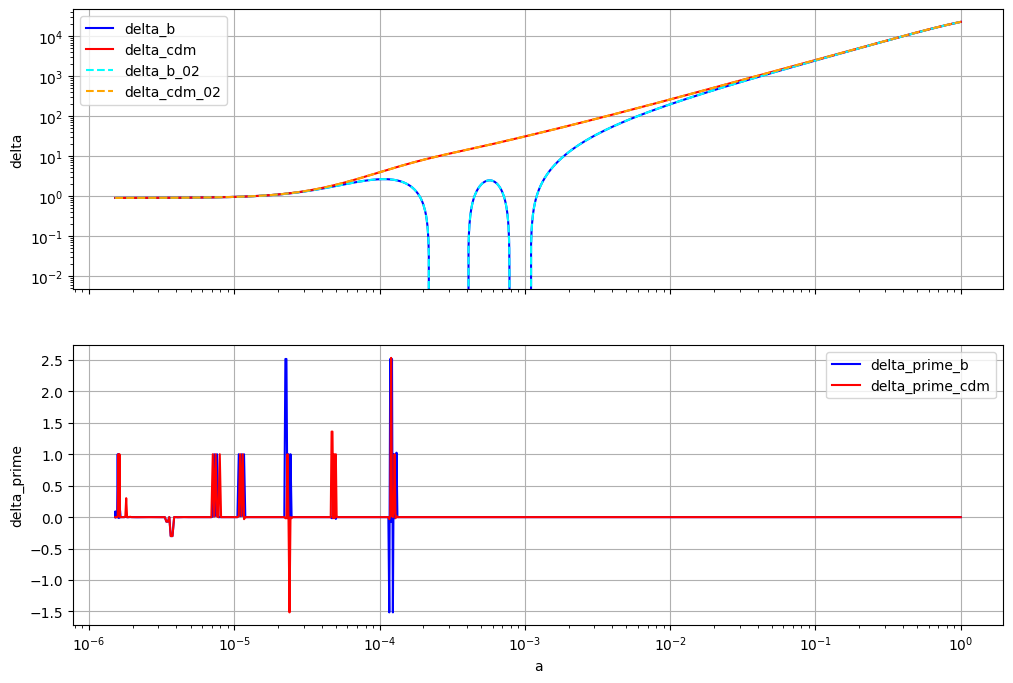

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot delta_b and delta_cdm vs a in the first subplot
axs[0].plot(df['a'], (-df['delta_b']), label='delta_b', color='blue')
axs[0].plot(df['a'], (-df['delta_cdm']), label='delta_cdm', color='red')
axs[0].plot(df2['a'], (-df2['delta_b']), label='delta_b_02', color='cyan', linestyle='--')
axs[0].plot(df2['a'], (-df2['delta_cdm']), label='delta_cdm_02', color='orange', linestyle='--')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel('delta')
axs[0].legend()
axs[0].grid()

# Plot delta_prime_b and delta_prime_cdm vs a in the second subplot
axs[1].plot(df['a'], df['delta_prime_b'], label='delta_prime_b', color='blue')
axs[1].plot(df['a'], df['delta_prime_cdm'], label='delta_prime_cdm', color='red')
axs[1].set_xscale('log')
# axs[1].set_yscale('log')
axs[1].set_xlabel('a')
axs[1].set_ylabel('delta_prime')
axs[1].legend()
axs[1].grid()

# plt.savefig('delta_prime_b_cdm_vs_a.png', dpi=300)
plt.show()

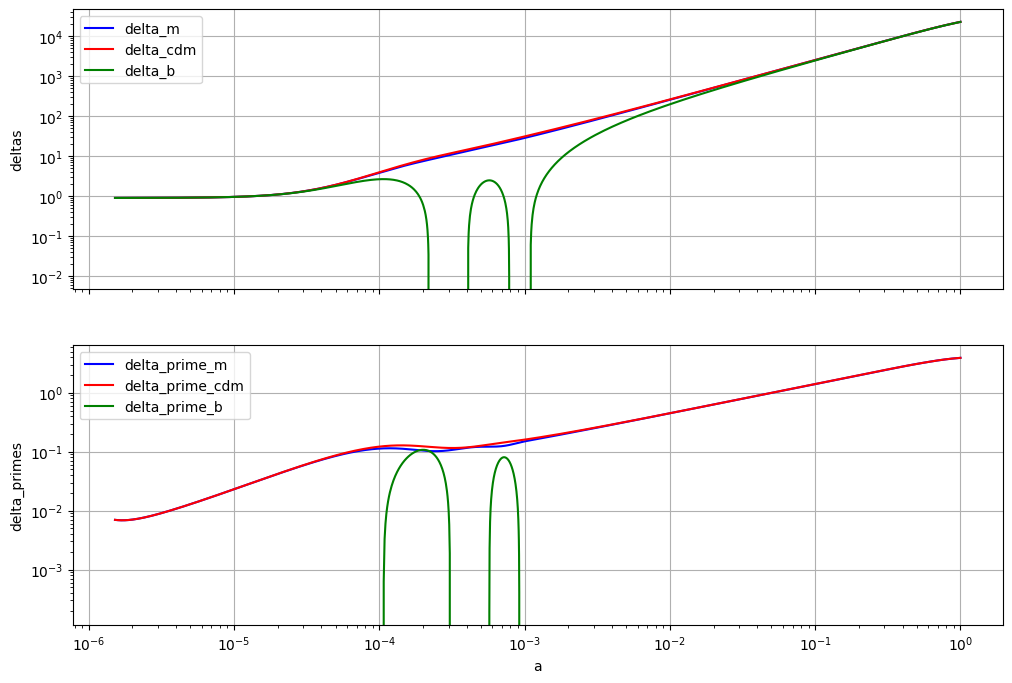

In [41]:
omega_m = 0.2723828
omega_b= 0.0223828
omega_cdm = omega_m - omega_b

df3['delta_m']= omega_cdm/omega_m * df3['delta_cdm'] + omega_b/omega_m * df3['delta_b']
df3['delta_prime_m'] = omega_cdm/omega_m * df3['delta_prime_cdm'] + omega_b/omega_m * df3['delta_prime_b']
# Add delta_m and delta_prime_m to df3
df3['delta_m'] = df3['delta_m'].astype(float)
df3['delta_prime_m'] = df3['delta_prime_m'].astype(float)
# Plot delta_m and delta_prime_m vs a in the first subplot

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
# Plot delta_m vs a in the first subplot
ax[0].plot(df3['a'], -df3['delta_m'], label='delta_m', color='blue')
ax[0].plot(df3['a'], -df3['delta_cdm'], label='delta_cdm', color='red')
ax[0].plot(df3['a'], -df3['delta_b'], label='delta_b', color='green')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('deltas')
ax[0].legend()
ax[0].grid()

# Plot delta_prime_m vs a in the second subplot
ax[1].plot(df3['a'], -df3['delta_prime_m'], label='delta_prime_m', color='blue')
ax[1].plot(df3['a'], -df3['delta_prime_cdm'], label='delta_prime_cdm', color='red')
ax[1].plot(df3['a'], df3['delta_prime_b'], label='delta_prime_b', color='green')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('a')
ax[1].set_ylabel('delta_primes')
ax[1].legend()
ax[1].grid()



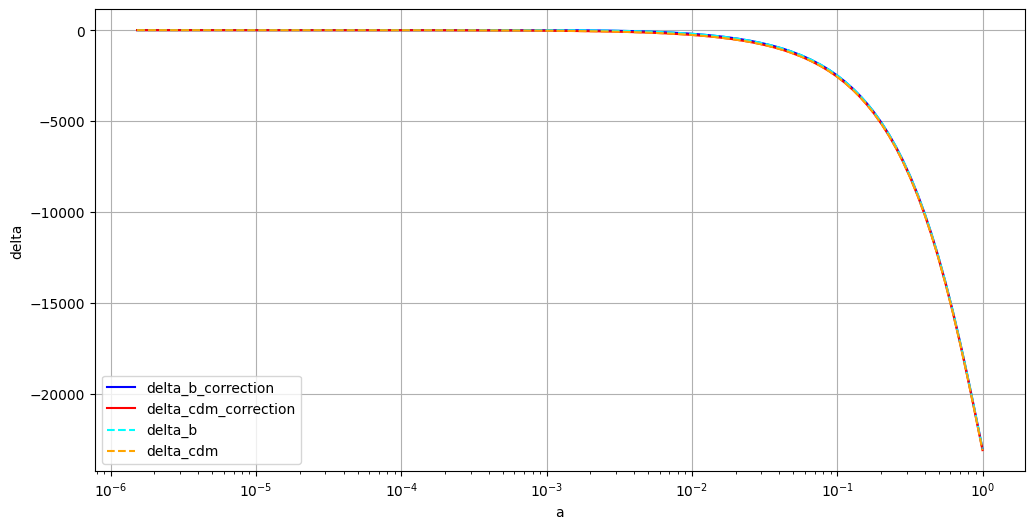

In [28]:
#compare with the other file in the same plot
fig = plt.figure(figsize=(12, 6))
plt.plot(df['a'], df['delta_b'], label='delta_b_correction', color='blue')
plt.plot(df['a'], df['delta_cdm'], label='delta_cdm_correction', color='red')
plt.plot(df2['a'], df2['delta_b'], label='delta_b', color='cyan', linestyle='--')
plt.plot(df2['a'], df2['delta_cdm'], label='delta_cdm', color='orange', linestyle='--')
# plt.plot(df['a'], df['delta_prime_b'], label='delta_prime_b', color='blue')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('a')
plt.ylabel('delta')
plt.legend()
plt.grid()
# plt.savefig('delta_prime_b_cdm_vs_a_02.png', dpi=300)
plt.show()